# Synchronous policy evaluation

In [3]:
m,n=5,5
S=[(r,c) for r in range (m) for c in range (n)]
A=['north', 'south', 'east', 'west']
acount=len(A)
terminal=[(4,4)]
gamma=1

In [4]:
def transition(s,a, s_next):
    r,c=s
    if a=='north':
      r=r if r==0 else r-1
    if a=='south':
      r=r if r==4 else r+1
    if a=='east':
      c=c if c==4 else c+1
    if a=='west':
      c=c if c==0 else c-1
    prob=1 if (r, c)==s_next else 0
    reward = -1
    return prob, reward



In [7]:
pi={s:{a:0.25 for a in A} for s in S}
import numpy as np

In [11]:
import numpy as np

def to_numpy(v, m, n):
    vnum = np.zeros((m, n))
    for s in v:
        vnum[s] = v[s]
    return vnum

theta = 1e-3  # Smaller convergence threshold for faster convergence
gamma = 1  # Assuming a discount factor of 1
delta = theta + 1
v = {s: 0 for s in S}
iter = 0

# Assuming a random policy where pi[s][a] = 1/len(A) for all states and actions
pi = {s: {a: 1/len(A) for a in A} for s in S}

while delta >= theta:
    iter += 1
    v_next = {s: 0 for s in S}
    delta = 0

    for s in S:
        if s in terminal:
            continue  # Skip terminal states

        # Evaluate the value for each action
        for a in A:
            total_value = 0  # Initialize the expected value for this action
            for s_next in S:
                prob, reward = transition(s, a, s_next)
                total_value += prob * (reward + gamma * v[s_next])
            v_next[s] += pi[s][a] * total_value  # Update value function based on policy

        # Update delta to track the maximum change in value
        delta = max(delta, abs(v_next[s] - v[s]))

    v = v_next.copy()  # Update the value function for the next iteration

# Round the value function for easier interpretation
v = {s: np.round(v[s], 2) for s in S}

# Print the number of iterations and the final value function
print(f"Number of iterations: {iter}")
print("Value function:")
print(v)

# Convert the value function to a NumPy array and print
v_array = to_numpy(v, m, n)
print(v_array)


Number of iterations: 647
Value function:
{(0, 0): -106.73, (0, 1): -104.73, (0, 2): -101.29, (0, 3): -97.54, (0, 4): -95.0, (1, 0): -104.73, (1, 1): -102.17, (1, 2): -97.62, (1, 3): -92.33, (1, 4): -88.46, (2, 0): -101.29, (2, 1): -97.62, (2, 2): -90.67, (2, 3): -81.72, (2, 4): -74.05, (3, 0): -97.54, (3, 1): -92.33, (3, 2): -81.72, (3, 3): -65.84, (3, 4): -47.96, (4, 0): -95.0, (4, 1): -88.46, (4, 2): -74.05, (4, 3): -47.96, (4, 4): 0}
[[-106.73 -104.73 -101.29  -97.54  -95.  ]
 [-104.73 -102.17  -97.62  -92.33  -88.46]
 [-101.29  -97.62  -90.67  -81.72  -74.05]
 [ -97.54  -92.33  -81.72  -65.84  -47.96]
 [ -95.    -88.46  -74.05  -47.96    0.  ]]


# Asynchronous update


In [12]:
import numpy as np

def to_numpy(v, m, n):
    vnum = np.zeros((m, n))
    for s in v:
        vnum[s] = v[s]
    return vnum

theta = 1e-3  # Convergence threshold
gamma = 1  # Discount factor
delta = theta + 1
v = {s: 0 for s in S}  # Initialize value function to 0 for all states
iter = 0

# Assuming a random policy where pi[s][a] = 1/len(A) for all states and actions
pi = {s: {a: 1/len(A) for a in A} for s in S}

while delta >= theta:
    iter += 1
    delta = 0

    for s in S:
        if s in terminal:
            continue  # Skip terminal states

        # Save the current value of the state for delta calculation later
        v_old = v[s]

        # Initialize new value for state s
        new_value = 0

        # Iterate over all actions
        for a in A:
            total_value = 0  # Expected value for the action a

            # Iterate over all possible next states
            for s_next in S:
                prob, reward = transition(s, a, s_next)
                total_value += prob * (reward + gamma * v[s_next])

            # Update the value of the state s based on the current policy
            new_value += pi[s][a] * total_value

        # In-place update of the value function
        v[s] = new_value

        # Update delta to track the maximum change in value
        delta = max(delta, abs(v[s] - v_old))

# Round the value function for easier interpretation
v = {s: np.round(v[s], 2) for s in S}

# Print the number of iterations and the final value function
print(f"Number of iterations: {iter}")
print("Value function:")
print(v)

# Convert the value function to a NumPy array and print
v_array = to_numpy(v, m, n)
print(v_array)


Number of iterations: 419
Value function:
{(0, 0): -106.76, (0, 1): -104.77, (0, 2): -101.33, (0, 3): -97.57, (0, 4): -95.03, (1, 0): -104.77, (1, 1): -102.21, (1, 2): -97.65, (1, 3): -92.37, (1, 4): -88.49, (2, 0): -101.33, (2, 1): -97.65, (2, 2): -90.7, (2, 3): -81.75, (2, 4): -74.07, (3, 0): -97.57, (3, 1): -92.37, (3, 2): -81.75, (3, 3): -65.86, (3, 4): -47.98, (4, 0): -95.03, (4, 1): -88.49, (4, 2): -74.07, (4, 3): -47.98, (4, 4): 0}
[[-106.76 -104.77 -101.33  -97.57  -95.03]
 [-104.77 -102.21  -97.65  -92.37  -88.49]
 [-101.33  -97.65  -90.7   -81.75  -74.07]
 [ -97.57  -92.37  -81.75  -65.86  -47.98]
 [ -95.03  -88.49  -74.07  -47.98    0.  ]]


# Monte Carlo on-policy update

In [13]:
import numpy as np
import random

def to_numpy(v, m, n):
    vnum = np.zeros((m, n))
    for s in v:
        vnum[s] = v[s]
    return vnum

# Parameters
gamma = 1  # Discount factor
num_episodes = 5000  # Number of episodes to run
max_steps_per_episode = 100  # Limit episode length to avoid infinite loops
epsilon = 0.1  # Small chance to explore (epsilon-greedy)

# Initialize value function and visit counts
v = {s: 0 for s in S}  # Value function initialized to 0
returns_sum = {s: 0 for s in S}  # Sum of returns for each state
returns_count = {s: 0 for s in S}  # Count of returns for each state

# Uniform random policy where each action has equal probability
pi = {s: {a: 1/len(A) for a in A} for s in S}

# Simulate episodes
for episode in range(num_episodes):
    # Generate an episode
    episode_data = []
    s = random.choice(S)  # Randomly select a start state
    for step in range(max_steps_per_episode):
        if s in terminal:
            break  # End the episode if a terminal state is reached

        # Select action based on the current policy
        a = random.choices(A, weights=[pi[s][action] for action in A])[0]

        # Simulate transition
        s_next = random.choice(S)  # Randomly select the next state
        prob, reward = transition(s, a, s_next)

        # Record state, action, reward, and next state
        episode_data.append((s, a, reward))
        s = s_next  # Move to the next state

    # Calculate returns and update value function
    G = 0  # Initialize return
    visited_states = set()  # To track first visits

    # Traverse the episode in reverse order
    for t in range(len(episode_data)-1, -1, -1):
        s, a, reward = episode_data[t]
        G = reward + gamma * G  # Update return

        # First-visit Monte Carlo: update only on the first visit of each state
        if s not in visited_states:
            returns_sum[s] += G
            returns_count[s] += 1
            v[s] = returns_sum[s] / returns_count[s]  # Update value function
            visited_states.add(s)

# Round the value function for easier interpretation
v = {s: np.round(v[s], 2) for s in S}

# Convert the value function to a NumPy array and print
v_array = to_numpy(v, m, n)
print("Final Value Function after Monte Carlo Evaluation:")
print(v_array)


Final Value Function after Monte Carlo Evaluation:
[[-12.25 -12.51 -12.92 -12.79 -12.77]
 [-12.39 -12.2  -12.35 -12.93 -12.7 ]
 [-12.65 -12.88 -12.3  -12.72 -12.39]
 [-12.23 -12.69 -12.83 -12.53 -12.6 ]
 [-12.28 -12.36 -12.48 -12.2    0.  ]]


# Monte Carlo off policy update

In [14]:
import numpy as np
import random

def to_numpy(v, m, n):
    vnum = np.zeros((m, n))
    for s in v:
        vnum[s] = v[s]
    return vnum

# Parameters
gamma = 1  # Discount factor
num_episodes = 5000  # Number of episodes to run
max_steps_per_episode = 100  # Limit episode length to avoid infinite loops

# Initialize value function and visit counts
v = {s: 0 for s in S}  # Value function initialized to 0
cumulative_weights = {s: 0 for s in S}  # Cumulative weights for states (for weighted importance sampling)

# Behavior policy: uniform random policy
behavior_policy = {s: {a: 1/len(A) for a in A} for s in S}

# Target policy: let's assume a deterministic policy for simplicity (agent always moves east if possible)
target_policy = {s: {a: 0 for a in A} for s in S}
for s in S:
    if 'east' in A:
        target_policy[s]['east'] = 1  # Agent always moves east in target policy

# Simulate episodes
for episode in range(num_episodes):
    # Generate an episode using the behavior policy
    episode_data = []
    s = random.choice(S)  # Randomly select a start state
    for step in range(max_steps_per_episode):
        if s in terminal:
            break  # End the episode if a terminal state is reached

        # Select action based on the behavior policy
        a = random.choices(A, weights=[behavior_policy[s][action] for action in A])[0]

        # Simulate transition
        s_next = random.choice(S)  # Randomly select the next state
        prob, reward = transition(s, a, s_next)

        # Record state, action, reward, and next state
        episode_data.append((s, a, reward))
        s = s_next  # Move to the next state

    # Calculate returns and update value function using importance sampling
    G = 0  # Initialize return
    importance_sampling_ratio = 1.0  # Initialize importance sampling ratio

    # Traverse the episode in reverse order
    for t in range(len(episode_data)-1, -1, -1):
        s, a, reward = episode_data[t]
        G = reward + gamma * G  # Update return

        # Calculate the importance sampling ratio
        if target_policy[s][a] == 0:
            break  # If the action is not part of the target policy, stop the update
        importance_sampling_ratio *= target_policy[s][a] / behavior_policy[s][a]

        # Update the cumulative weights and value function using weighted importance sampling
        cumulative_weights[s] += importance_sampling_ratio
        v[s] += (importance_sampling_ratio / cumulative_weights[s]) * (G - v[s])

# Round the value function for easier interpretation
v = {s: np.round(v[s], 2) for s in S}

# Convert the value function to a NumPy array and print
v_array = to_numpy(v, m, n)
print("Final Value Function after Monte Carlo Off-Policy Evaluation:")
print(v_array)


Final Value Function after Monte Carlo Off-Policy Evaluation:
[[-3.86 -2.53 -2.04 -1.83 -2.59]
 [-2.67 -2.74 -2.55 -1.78 -5.25]
 [-2.55 -2.14 -2.67 -3.86 -2.46]
 [-3.82 -5.56 -2.03 -3.95 -2.89]
 [-2.08 -2.54 -1.66 -1.95  0.  ]]


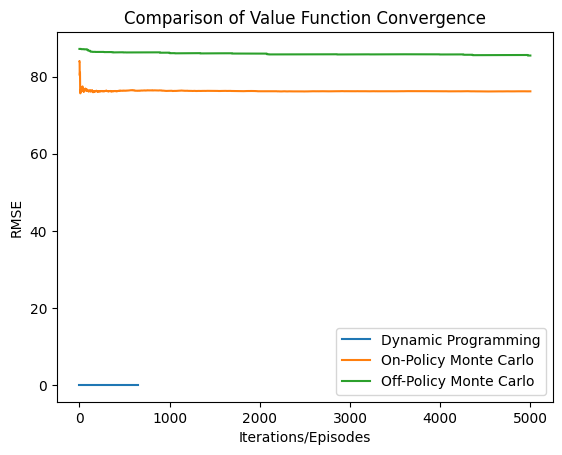

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the grid environment
m, n = 5, 5
S = [(r, c) for r in range(m) for c in range(n)]  # State space
A = ['north', 'south', 'east', 'west']  # Actions
terminal = [(4, 4)]  # Terminal state
gamma = 1  # Discount factor

# Transition function
def transition(s, a, s_next):
    r, c = s
    if a == 'north':
        r = r if r == 0 else r - 1
    if a == 'south':
        r = r if r == 4 else r + 1
    if a == 'east':
        c = c if c == 4 else c + 1
    if a == 'west':
        c = c if c == 0 else c - 1
    prob = 1 if (r, c) == s_next else 0
    reward = 0 if s_next in terminal else -1
    return prob, reward

# Convert value function dictionary to NumPy array for easy display
def to_numpy(v, m, n):
    vnum = np.zeros((m, n))
    for s in v:
        vnum[s] = v[s]
    return vnum

# Compute RMSE between two value functions
def compute_rmse(v, v_true):
    error = 0
    for s in v:
        error += (v[s] - v_true[s]) ** 2
    return np.sqrt(error / len(v))

#############################
# 1. Dynamic Programming (Synchronous)
#############################
v_dp = {s: 0 for s in S}  # Initialize value function
theta = 1e-3  # Convergence threshold
delta = theta + 1
iter_dp = 0
rmse_dp = []  # Track RMSE over iterations
pi = {s: {a: 1/len(A) for a in A} for s in S}  # Uniform random policy

while delta >= theta:
    iter_dp += 1
    v_next = {s: 0 for s in S}
    delta = 0

    for s in S:
        if s in terminal:
            continue

        for a in A:
            total_value = 0
            for s_next in S:
                prob, reward = transition(s, a, s_next)
                total_value += prob * (reward + gamma * v_dp[s_next])
            v_next[s] += pi[s][a] * total_value

        delta = max(delta, abs(v_next[s] - v_dp[s]))

    v_dp = v_next.copy()  # Update the value function
    rmse_dp.append(compute_rmse(v_dp, v_dp))  # Compare to itself for now

# Save final DP value function as the true reference
v_true = v_dp.copy()

#############################
# 2. Monte Carlo On-Policy
#############################
num_episodes = 5000
max_steps_per_episode = 100
v_on_policy = {s: 0 for s in S}  # Initialize value function
returns_sum = {s: 0 for s in S}  # Sum of returns for each state
returns_count = {s: 0 for s in S}  # Count of returns for each state
rmse_on_policy = []

for episode in range(num_episodes):
    episode_data = []
    s = random.choice(S)
    for step in range(max_steps_per_episode):
        if s in terminal:
            break
        a = random.choices(A, weights=[pi[s][action] for action in A])[0]
        s_next = random.choice(S)
        prob, reward = transition(s, a, s_next)
        episode_data.append((s, a, reward))
        s = s_next

    G = 0
    visited_states = set()

    for t in range(len(episode_data) - 1, -1, -1):
        s, a, reward = episode_data[t]
        G = reward + gamma * G
        if s not in visited_states:
            returns_sum[s] += G
            returns_count[s] += 1
            v_on_policy[s] = returns_sum[s] / returns_count[s]
            visited_states.add(s)

    # Track RMSE against DP solution
    rmse_on_policy.append(compute_rmse(v_on_policy, v_true))

#############################
# 3. Monte Carlo Off-Policy
#############################
v_off_policy = {s: 0 for s in S}  # Initialize value function
cumulative_weights = {s: 0 for s in S}  # Cumulative weights
rmse_off_policy = []
behavior_policy = {s: {a: 1/len(A) for a in A} for s in S}  # Random behavior policy
target_policy = {s: {a: 0 for a in A} for s in S}  # Always move east
for s in S:
    if 'east' in A:
        target_policy[s]['east'] = 1

for episode in range(num_episodes):
    episode_data = []
    s = random.choice(S)
    for step in range(max_steps_per_episode):
        if s in terminal:
            break
        a = random.choices(A, weights=[behavior_policy[s][action] for action in A])[0]
        s_next = random.choice(S)
        prob, reward = transition(s, a, s_next)
        episode_data.append((s, a, reward))
        s = s_next

    G = 0
    importance_sampling_ratio = 1.0

    for t in range(len(episode_data) - 1, -1, -1):
        s, a, reward = episode_data[t]
        G = reward + gamma * G
        if target_policy[s][a] == 0:
            break
        importance_sampling_ratio *= target_policy[s][a] / behavior_policy[s][a]
        cumulative_weights[s] += importance_sampling_ratio
        v_off_policy[s] += (importance_sampling_ratio / cumulative_weights[s]) * (G - v_off_policy[s])

    # Track RMSE against DP solution
    rmse_off_policy.append(compute_rmse(v_off_policy, v_true))

#############################
# Plot Comparison of RMSE
#############################
plt.plot(rmse_dp, label="Dynamic Programming")
plt.plot(rmse_on_policy, label="On-Policy Monte Carlo")
plt.plot(rmse_off_policy, label="Off-Policy Monte Carlo")
plt.xlabel('Iterations/Episodes')
plt.ylabel('RMSE')
plt.title('Comparison of Value Function Convergence')
plt.legend()
plt.show()
